In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import matplotlib
matplotlib.rcParams.update({'font.size': 23})

In [4]:
class ComboMortgage:
    def __init__(self, B_0, T, alpha_list):
        self.B_0 = B_0 # update B_0 when alpha changes
        self.T = T # update T to T-t where t is 
        self.T_orig = T
        self.alpha = alpha_list # A list of the interest rates at each time t from 1 to T

    def r(self, B_0, T, alpha):
        return (alpha * B_0)/(1-np.exp(-alpha*T))

    def B(self, t, B_0, T, alpha):
        return self.B_0 * np.exp(alpha * t) - (B_0 * np.exp(alpha * T))/(1 - np.exp(alpha * T)) * (1 - np.exp(alpha * t))

    def calc_B_and_r(self):
        B_list = [B_0]
        r_list = []
        t_offset = 0
        for t in range(1, self.T_orig+1):
            B_list.append(self.B(t - t_offset, self.B_0, self.T, self.alpha[t-1]))
            r_list.append(self.r(self.B_0, self.T, self.alpha[t-1]))
            # If the interest rate changes for the next month
            if t < self.T_orig and self.alpha[t] != self.alpha[t-1]: # t!=self.T_orig and
                self.B_0 = B_list[t] # Set new B_0 to current balance
                self.T = self.T_orig - t # Set end time T to original T - current iter t
                t_offset = t # Update offset to correctly utilise t

        r_list.append(self.r(self.B_0, self.T, self.alpha[-1]))
            

        return B_list, r_list  

### Two fixed rates combined

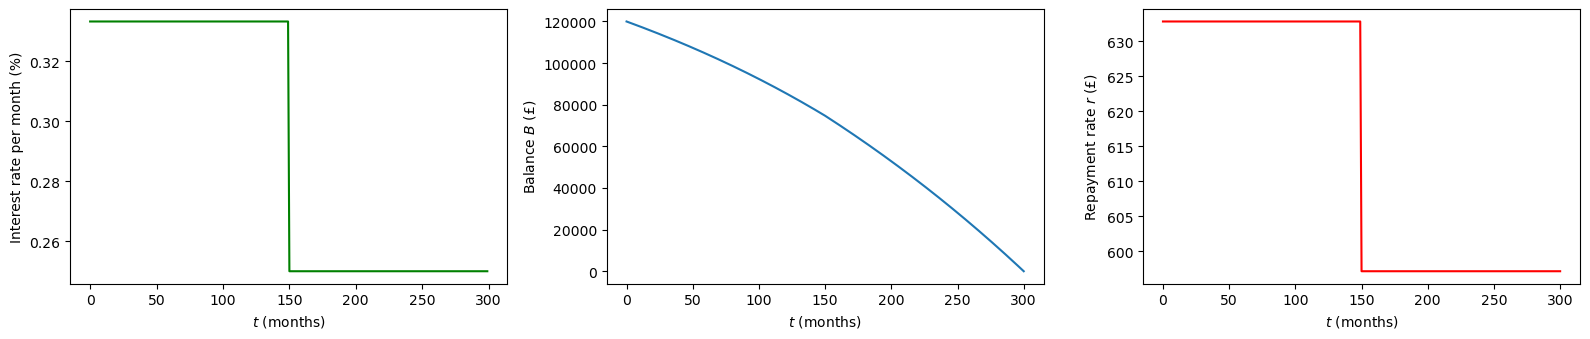

In [3]:
B_0 = 120000
T = 300
a1 = [0.04/12 for i in range(150)]
a2 = [0.03/12 for i in range(150)]
a_list = a1 + a2
c = ComboMortgage(B_0, T, a_list)
B_list, r_list = c.calc_B_and_r()

plt.figure(figsize=(16,3.5))
plt.subplot(131)
plt.plot(np.array(a_list)*100, 'g')
plt.ylabel("Interest rate per month (%)")
plt.xlabel("$t$ (months)")
plt.subplot(132)
plt.plot(B_list)
plt.xlabel("$t$ (months)")
plt.ylabel("Balance $B$ (£)")
plt.subplot(133)
plt.plot(np.array(r_list), 'r')
plt.xlabel("$t$ (months)")
plt.ylabel("Repayment rate $r$ (£)")
plt.tight_layout()
plt.savefig("ComboInterest2.pdf")

In [4]:
B_list[-1]

0.0

### 6 fixed rates combined

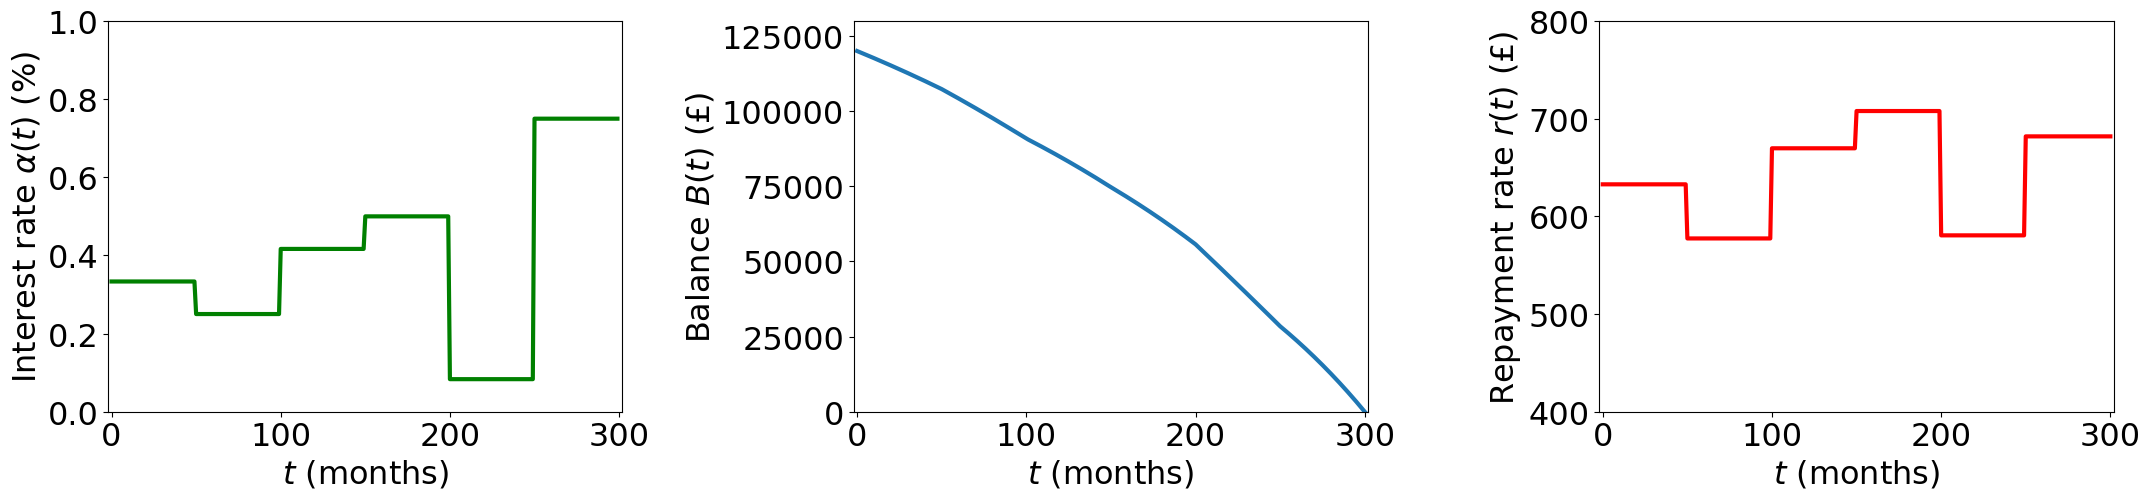

In [29]:
B_0 = 120000
T = 300
a1 = [0.04/12 for i in range(50)]
a2 = [0.03/12 for i in range(50)]
a3 = [0.05/12 for i in range(50)]
a4 = [0.06/12 for i in range(50)]
a5 = [0.01/12 for i in range(50)]
a6 = [0.09/12 for i in range(50)]
a_list = a1 + a2 + a3 + a4 + a5 + a6
c = ComboMortgage(B_0, T, a_list)
B_list, r_list = c.calc_B_and_r()

plt.figure(figsize=(22,5.5))
plt.subplot(131)
plt.xlim(-2,302)
plt.ylim(0,1)
plt.plot(np.array(a_list)*100, 'g', linewidth=3)
plt.ylabel("Interest rate $α(t)$ (%)")
plt.xlabel("$t$ (months)")
plt.subplot(132)
plt.plot(B_list, linewidth=3)
plt.xlim([-2,302])
plt.ylim([0,130000])
plt.xlabel("$t$ (months)")
plt.ylabel("Balance $B(t)$ (£)")
plt.subplot(133)
plt.plot(np.array(r_list), 'r', linewidth=3)
plt.xlabel("$t$ (months)")
plt.ylabel("Repayment rate $r(t)$ (£)")
plt.xlim(-2,302)
plt.ylim(400,800)
plt.tight_layout()
plt.savefig("ComboInterest6.pdf", bbox_inches='tight')

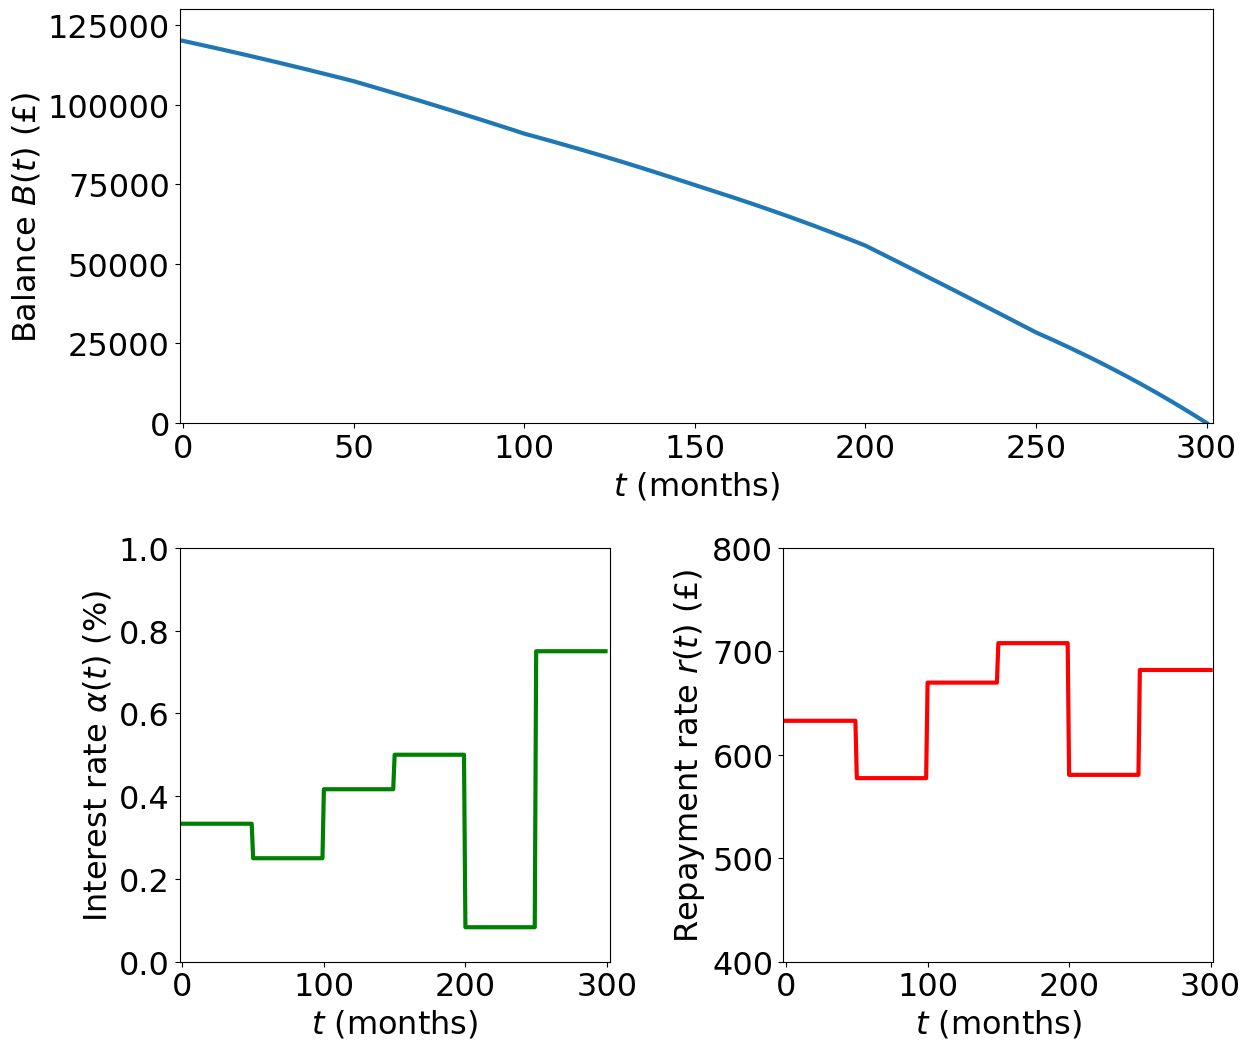

In [32]:
B_0 = 120000
T = 300
a1 = [0.04/12 for i in range(50)]
a2 = [0.03/12 for i in range(50)]
a3 = [0.05/12 for i in range(50)]
a4 = [0.06/12 for i in range(50)]
a5 = [0.01/12 for i in range(50)]
a6 = [0.09/12 for i in range(50)]
a_list = a1 + a2 + a3 + a4 + a5 + a6
c = ComboMortgage(B_0, T, a_list)
B_list, r_list = c.calc_B_and_r()

plt.figure(figsize=(13,11))
plt.subplot(211)
plt.plot(B_list, linewidth=3)
plt.xlim([-1,302])
plt.ylim([-5,130000])
plt.xlabel("$t$ (months)")
plt.ylabel("Balance $B(t)$ (£)")
plt.subplot(223)
plt.xlim(-2,302)
plt.ylim(0,1)
plt.plot(np.array(a_list)*100, 'g', linewidth=3)
plt.ylabel("Interest rate $α(t)$ (%)")
plt.xlabel("$t$ (months)")
plt.subplot(224)
plt.plot(np.array(r_list), 'r', linewidth=3)
plt.xlabel("$t$ (months)")
plt.ylabel("Repayment rate $r(t)$ (£)")
plt.xlim(-2,302)
plt.ylim(400,800)
plt.tight_layout()
plt.savefig("ComboInterest6sq.pdf", bbox_inches='tight')

### Real World Data Simulation

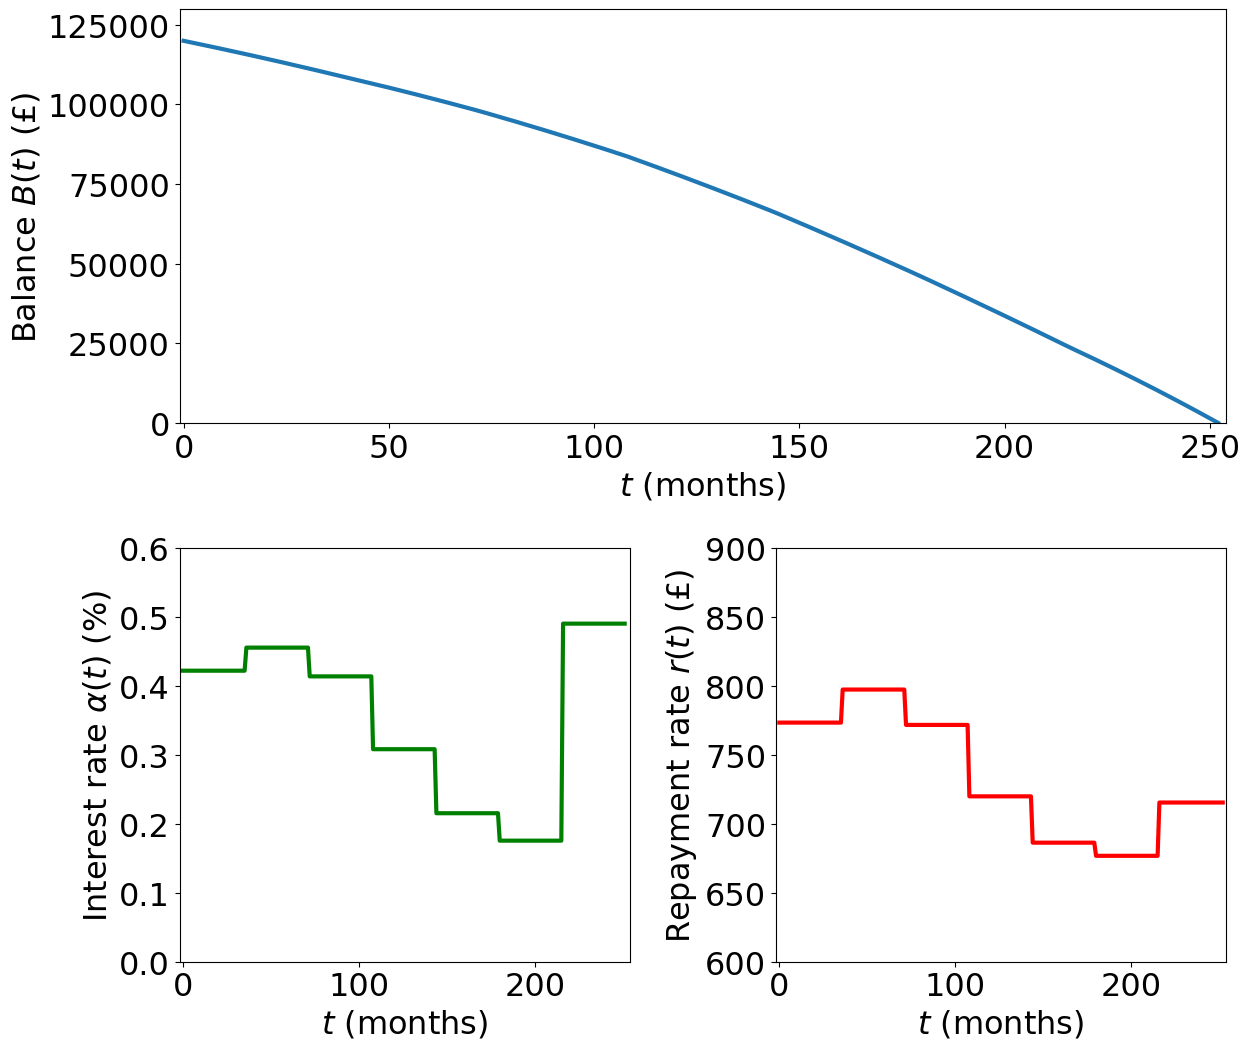

In [9]:
B_0 = 120000
T = 12*21
a1 = [0.0506166/12 for i in range(36)]
a2 = [0.0546301/12 for i in range(36)]
a3 = [0.0496278/12 for i in range(36)]
a4 = [0.0369639/12 for i in range(36)]
a5 = [0.0258278/12 for i in range(36)]
a6 = [0.0210556/12 for i in range(36)]
a7 = [0.0588/12 for i in range(36)]
a_list = a1 + a2 + a3 + a4 + a5 + a6 + a7
c = ComboMortgage(B_0, T, a_list)
B_list, r_list = c.calc_B_and_r()

plt.figure(figsize=(13,11))
plt.subplot(211)
plt.plot(B_list, linewidth=3)
plt.xlim([-1,254])
plt.ylim([-50,130000])
plt.xlabel("$t$ (months)")
plt.ylabel("Balance $B(t)$ (£)")
plt.subplot(223)
plt.xlim(-2,254)
plt.ylim(0,0.6)
plt.plot(np.array(a_list)*100, 'g', linewidth=3)
plt.ylabel("Interest rate $α(t)$ (%)")
plt.xlabel("$t$ (months)")
plt.subplot(224)
plt.plot(np.array(r_list), 'r', linewidth=3)
plt.xlabel("$t$ (months)")
plt.ylabel("Repayment rate $r(t)$ (£)")
plt.xlim(-2,254)
plt.ylim(600,900)
plt.tight_layout()
plt.savefig("ComboInterestRealWorldData.pdf", bbox_inches='tight')

In [6]:
a_list[-1]

0.0049

In [7]:
a_list[-37]

0.0017546333333333334

In [10]:
r_list[-1]

715.3640902572982

In [12]:
r_list[-38]

676.7520704295886

In [13]:
max(r_list)

797.2376568128904

### Random interest rate every month

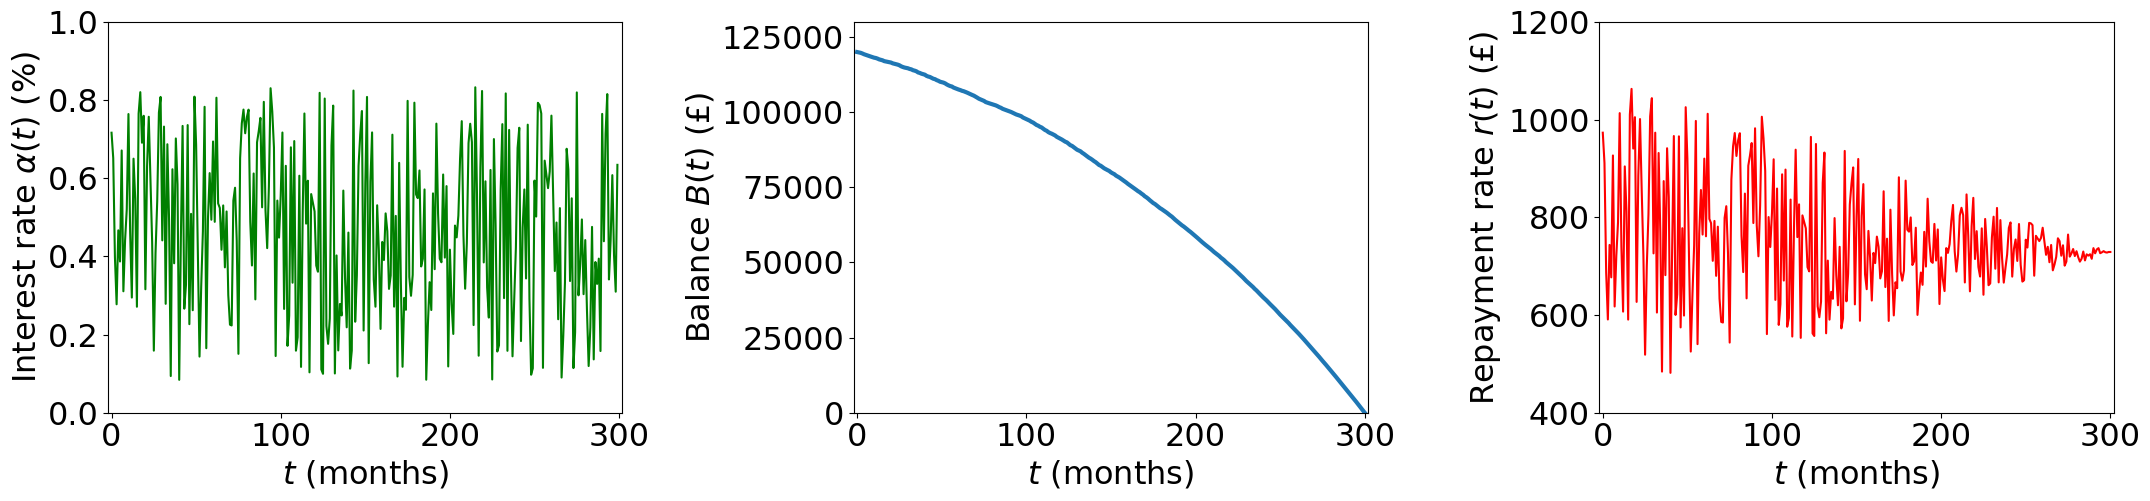

In [25]:
import random
random.seed(0)
B_0 = 120000
T = 300
a_list = [random.uniform(0.01/12, 0.1/12) for i in range(T)]
c = ComboMortgage(B_0, T, a_list)
B_list, r_list = c.calc_B_and_r()

plt.figure(figsize=(22,5.5))
plt.subplot(131)
plt.xlim(-2,302)
plt.ylim(0,1)
plt.plot(np.array(a_list)*100, 'g')
plt.ylabel("Interest rate $α(t)$ (%)")
plt.xlabel("$t$ (months)")
plt.subplot(132)
plt.plot(B_list, linewidth=3)
plt.xlim([-2,302])
plt.ylim([0,130000])
plt.xlabel("$t$ (months)")
plt.ylabel("Balance $B(t)$ (£)")
plt.subplot(133)
plt.plot(np.array(r_list), 'r')
plt.xlabel("$t$ (months)")
plt.ylabel("Repayment rate $r(t)$ (£)")
plt.xlim(-2,302)
plt.ylim(400,1200)
plt.tight_layout()
plt.savefig("ComboInterest300.pdf", bbox_inches='tight')

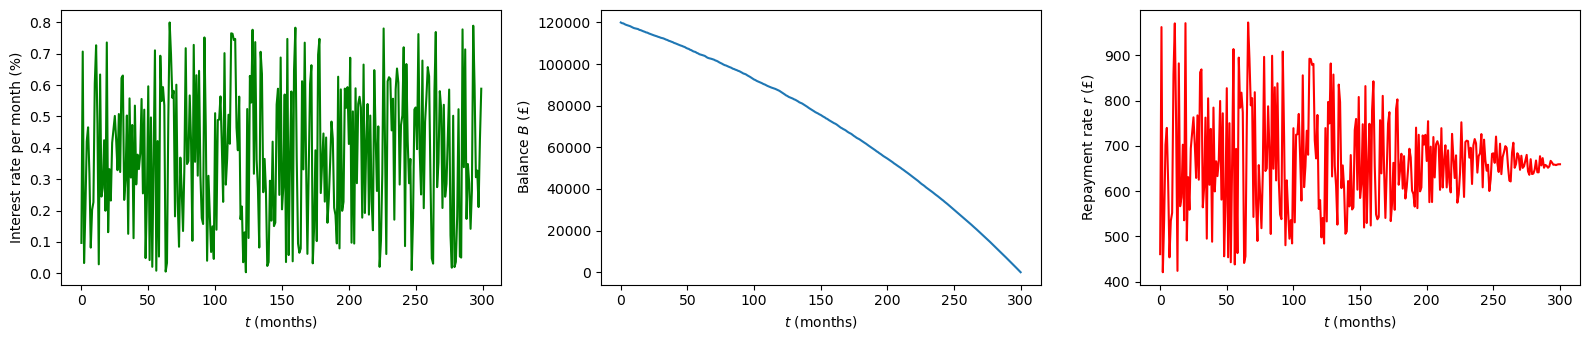

In [11]:
import random
B_0 = 120000
T = 300
a_list = [random.uniform(0.01/12, 0.1/12) for i in range(T)]
a_list = [random.random()/125 for i in range(T)]
c = ComboMortgage(B_0, T, a_list)
B_list, r_list = c.calc_B_and_r()

plt.figure(figsize=(16,3.5))
plt.subplot(131)
plt.plot(np.array(a_list)*100, 'g')
plt.ylabel("Interest rate per month (%)")
plt.xlabel("$t$ (months)")
plt.subplot(132)
plt.plot(B_list)
plt.xlabel("$t$ (months)")
plt.ylabel("Balance $B$ (£)")
plt.subplot(133)
plt.plot(np.array(r_list), 'r')
plt.xlabel("$t$ (months)")
plt.ylabel("Repayment rate $r$ (£)")
plt.tight_layout()
plt.savefig("ComboInterest300.pdf")

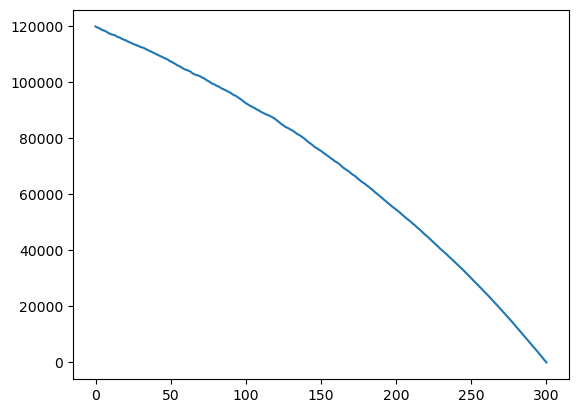

In [12]:
plt.plot(B_list)

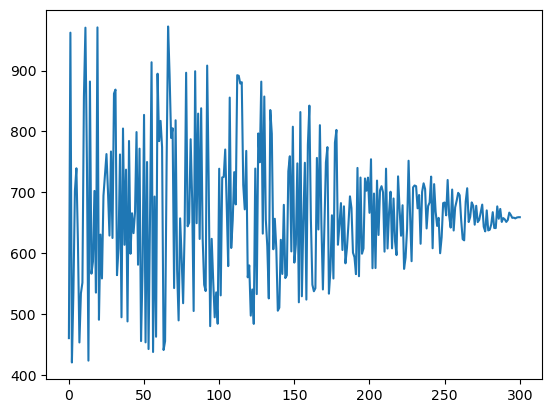

In [13]:
plt.plot(r_list)